In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
#data preprocessing 
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [6]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [7]:
x_train /=255
x_test /=255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [9]:
model.compile(optimizer="adagrad", loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,epochs=10)


Epoch 1/10


1875/1875 [==============================] - 26s 11ms/step - loss: 1.1683 - accuracy: 0.7124
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4861 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3974 - accuracy: 0.8868
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3523 - accuracy: 0.8987
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3269 - accuracy: 0.9055
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3063 - accuracy: 0.9122
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2866 - accuracy: 0.9178
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2737 - accuracy: 0.9218
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2605 - accuracy: 0.9248
Epoch 10/10
1875/1875 [==============================] - 21s 

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2096 - accuracy: 0.9401


[0.20955277979373932, 0.9401000142097473]

In [11]:
y_predict=model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [12]:
y_predict=np.argmax(y_predict,axis=1)
y_test_eval=np.argmax(y_test)

In [13]:
y_test_eval=y_test.flatten()

C:\Users\hp\AppData\Local\Temp\ipykernel_12368\592471123.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


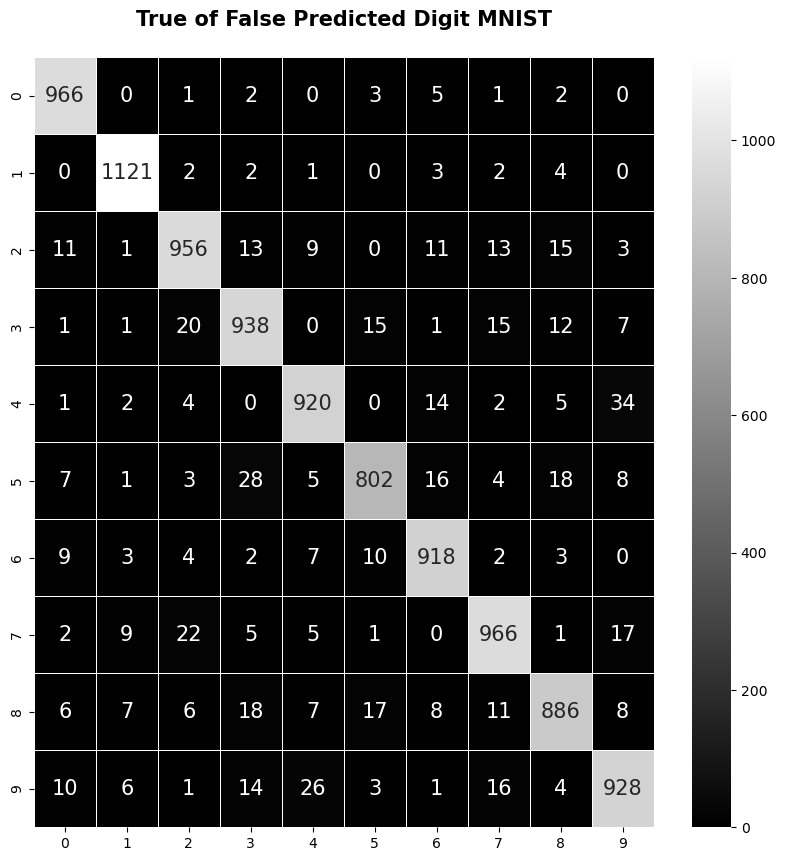

In [14]:
#plot the confusion matrix
con_mat=confusion_matrix(y_test_eval,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True of False Predicted Digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.92      0.93      0.92      1010
           4       0.94      0.94      0.94       982
           5       0.94      0.90      0.92       892
           6       0.94      0.96      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


1/1 [==============================] - 0s 47ms/step
6


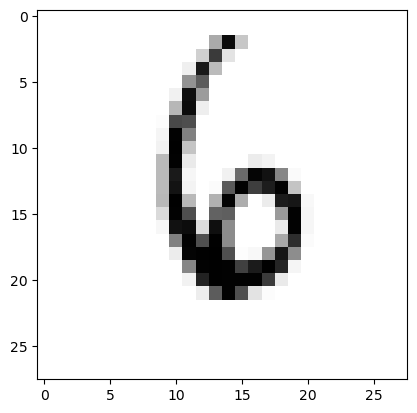

In [17]:
import matplotlib.pyplot as plt
image_index=6900,
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
predict=x_test[image_index].reshape(28,28)
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())